In [1]:
# Dependencies
import requests
from pprint import pprint
#from config_om import api_key
#from config_ab import api_key
#from config_kr import bls_key
from config_am import api_key
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os


#url = "https://api.nytimes.com/svc/search/v2/articlesearch.json?"
#url


In [2]:
# Import source data
glassdoor_file = pd.read_csv("./remote_resources/glassdoor/glassdoor.csv")
stackoverflow_file = pd.read_csv("./remote_resources/stackoverflow/2019-survey/survey_results_public_prepped.csv")
h1b1_visas_file = pd.read_csv("./remote_resources/h1b-visas/h1b18.csv")


In [3]:
# Prepare Stack Overflow Survey data for analysis (Filtering to a subset of Columns)
stack_overflow_filtered_columns = stackoverflow_file[['MainBranch','Hobbyist','Employment','Country','Student','EdLevel','EduOther','OrgSize','DevType','YearsCode','YearsCodePro','CareerSat','JobSat','CompTotal','ConvertedComp','WorkWeekHrs','LanguageWorkedWith','LanguageDesireNextYear','DatabaseWorkedWith','DatabaseDesireNextYear','PlatformWorkedWith','PlatformDesireNextYear','Age','Gender','Ethnicity', 'DataScienceDomain'
]]

In [4]:
# Isolate US based surveys, with a Data Science Domain for which the records are complete (i.e. 'NaNs' removed)
stack_overflow_filtered_USOnly = stack_overflow_filtered_columns.loc[stack_overflow_filtered_columns['Country'] == 'United States']
stack_overflow_filtered_DataScienceDomain_USOnly = stack_overflow_filtered_USOnly.loc[stack_overflow_filtered_USOnly['DataScienceDomain'] == True]
stack_overflow_df = pd.DataFrame(stack_overflow_filtered_DataScienceDomain_USOnly.dropna())
stack_overflow_df.count()

MainBranch                1897
Hobbyist                  1897
Employment                1897
Country                   1897
Student                   1897
EdLevel                   1897
EduOther                  1897
OrgSize                   1897
DevType                   1897
YearsCode                 1897
YearsCodePro              1897
CareerSat                 1897
JobSat                    1897
CompTotal                 1897
ConvertedComp             1897
WorkWeekHrs               1897
LanguageWorkedWith        1897
LanguageDesireNextYear    1897
DatabaseWorkedWith        1897
DatabaseDesireNextYear    1897
PlatformWorkedWith        1897
PlatformDesireNextYear    1897
Age                       1897
Gender                    1897
Ethnicity                 1897
DataScienceDomain         1897
dtype: int64

In [5]:
# Define Categories for Analysis
# group by education level
so_groupby_edu = stack_overflow_df.groupby('EdLevel') 

In [6]:
# group by gender
so_groupby_gender = stack_overflow_df.groupby('Gender')

so_groupby_devtype = stack_overflow_df.groupby('DevType')

so_groupby_age = stack_overflow_df.groupby('Age')

so_groupby_emp = stack_overflow_df.groupby('Employment')

so_groupby_mainbranch = stack_overflow_df.groupby('MainBranch')

so_groupby_degree_DevType = stack_overflow_df.groupby(['EdLevel','DevType'] ).agg({'Age': ['count']})

#print(glassdoor_file.head())
#print(stackoverflow_file.head())

In [7]:
print(stack_overflow_df['EdLevel'].unique())
print("-----------------------------------------------"*2)
print(stack_overflow_df['DevType'].unique())

['Master’s degree (MA, MS, M.Eng., MBA, etc.)'
 'Some college/university study without earning a degree'
 'Bachelor’s degree (BA, BS, B.Eng., etc.)'
 'Other doctoral degree (Ph.D, Ed.D., etc.)'
 'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)'
 'Associate degree' 'Professional degree (JD, MD, etc.)'
 'I never completed any formal education' 'Primary/elementary school']
----------------------------------------------------------------------------------------------
['Data or business analyst;Database administrator;Developer, back-end;Developer, desktop or enterprise applications;Developer, front-end;Developer, full-stack;Developer, mobile;DevOps specialist;Engineer, data;Engineer, site reliability;Engineering manager;Senior executive/VP;System administrator'
 'Data or business analyst;Designer;Developer, back-end;Developer, desktop or enterprise applications;Developer, front-end;Developer, full-stack;DevOps specialist;System administrator'
 'Developer, 

In [8]:
so_groupby_mainbranch['Gender'].count()
print(so_groupby_edu['Gender'].count())
print("-----------------------------------------------"*2)
#print(so_groupby_devtype['Gender'].count())

EdLevel
Associate degree                                                                       69
Bachelor’s degree (BA, BS, B.Eng., etc.)                                              940
I never completed any formal education                                                  7
Master’s degree (MA, MS, M.Eng., MBA, etc.)                                           477
Other doctoral degree (Ph.D, Ed.D., etc.)                                             145
Primary/elementary school                                                               7
Professional degree (JD, MD, etc.)                                                      7
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     38
Some college/university study without earning a degree                                207
Name: Gender, dtype: int64
----------------------------------------------------------------------------------------------


In [57]:
stack_overflow_educlean_df = stack_overflow_df['EdLevel'].replace({'Master’s degree (MA, MS, M.Eng., MBA, etc.)':"Masters",
       'Some college/university study without earning a degree':'Non Degree',
       'Bachelor’s degree (BA, BS, B.Eng., etc.)':'Bachelors',
       'Other doctoral degree (Ph.D, Ed.D., etc.)':'Doctoral',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)':'Non Degree',
       'Associate degree':'Associates', 'Professional degree (JD, MD, etc.)':'Masters',
       'I never completed any formal education':'Non Degree',
       'Primary/elementary school':'Non Degree'}).reset_index()

In [58]:
so_unique_edulevel_df = pd.DataFrame(stack_overflow_educlean_df['EdLevel'].unique()).reset_index()
so_unique_edulevel_df

,index,0
0,0,Masters
1,1,Non Degree
2,2,Bachelors
3,3,Doctoral
4,4,Associates


In [59]:
del so_unique_edulevel_df['index']


In [60]:
so_unique_edulevel_rename_column_df = so_unique_edulevel_df.rename(columns={'0':'EdLevel'})



In [61]:
so_unique_edulevel_df.rename(columns={0:'EdLevel'})


,EdLevel
0,Masters
1,Non Degree
2,Bachelors
3,Doctoral
4,Associates


In [62]:
so_unique_edulevel_rename_column_df

,0
0,Masters
1,Non Degree
2,Bachelors
3,Doctoral
4,Associates


In [63]:
edulevel_clean_grp = stack_overflow_educlean_df.groupby('EdLevel')

so_counts_by_edulevel = edulevel_clean_grp['index'].count().reset_index()

print(so_counts_by_edulevel)

      EdLevel  index
0  Associates     69
1   Bachelors    940
2    Doctoral    145
3     Masters    484
4  Non Degree    259


In [69]:
#create pie chart 
#Labels for the sections of our pie chart
#labels = ["Never Completed formal Education", "Bachelors Degree", "Masters Degree", "Some College"]
labels = []
for label in (so_unique_edulevel_df[0]):
    labels.append(label)

print(labels)

['Masters', 'Non Degree', 'Bachelors', 'Doctoral', 'Associates']


In [70]:
# The values of each section of the pie chart
sizes = []
for size in (so_counts_by_edulevel['index']):
    sizes.append(size)
    
print(sizes)


[69, 940, 145, 484, 259]


In [71]:
# The colors of each section of the pie chart
colors = ["red", "orange", "lightcoral", "lightskyblue", "yellow"]

In [72]:
# Tells matplotlib to seperate the "Never Completed Formal Education" section from the others
explode = (0.1, 0, 0, 0, 0)


([<matplotlib.patches.Wedge at 0x2af097d8f88>,
 [Text(-1.0012080319316798, 0.6615001714251422, 'Masters'),
  Text(-0.511533202823874, -0.9738243077725826, 'Non Degree'),
  Text(1.0637009341138768, -0.28025046434442596, 'Bachelors'),
  Text(0.7788543303656831, 0.7767792041955188, 'Doctoral'),
  Text(-0.4722511526660379, 0.9934680914883973, 'Associates')],
 [Text(-0.5840380186268133, 0.3858750999979995, '3.6%'),
  Text(-0.279018110631204, -0.5311768951486813, '49.6%'),
  Text(0.5802005095166599, -0.15286388964241412, '7.6%'),
  Text(0.42482963474491797, 0.4236977477430102, '25.5%'),
  Text(-0.25759153781783883, 0.5418916862663985, '13.7%')])

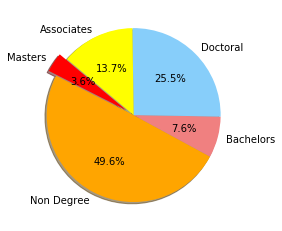

In [73]:
# find % for each label charted 
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)



(-0.05, 1.05, -0.05, 1.05)

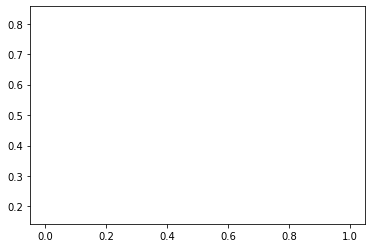

In [74]:
 # equal axes 
plt.axis("equal")